In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.listdir("../input/")
df = pd.read_csv("../input/housing.csv")


      
      
      

# Any results you write to the current directory are saved as output.

In [ ]:
df.head
df.describe()

**REGRESSION ALGORITHM**
this deserve a right attention , because many problems , even intrinsically non-linear ones . can be easily solved with this model

**Linear nmodel for regeression**
1. Data set of real value vectors drawn from a data generating process data
  X= {x1, x2, .. xn}
  
2. for each input vector is ac=soociate with real value yi
  Y = {y1 , y2 , . . .  ,yn}  where yi implies set of real values.
  
  
*Regression analysis is a form of predictive modelling technique which investigates the relationship between dependent and independent variable* 

**Three major uses for regression analysis**
1. Determining the strength of prediction 
2. forecasting an effect , and
3. Trends forecasting 

**why to select linear regression over others**
> classification and regression capabilities 
> data quality easily to identify class outlier 
> computational complexity is less O(x^2) over any another algorithm
> comprehnsible and transparent


**Where is linear regression used **

1. evaluating trends and sales estimation 
2. analyzing the impact of price change
3. assesment of risk and financial services and insurance domains .










**Understanding the linear regression**

"linear regression is all about the concept of straight line y= mx +c " (where c is intercept abou y axis)
whole linear regression is dependent on only this formula when its come to visualization and regresion and finding the relation between dependent and independent variables .

IN DATA SCIENCE WORLD IT IS CLAIMED THAT ABOUT 70% PROBLEM CAN BE SOLVED BY LINEAR REGRESSION ALGORITHM AND IT IS MOST POPULAR AMON ANY OF ANOTHER ALGORITHM


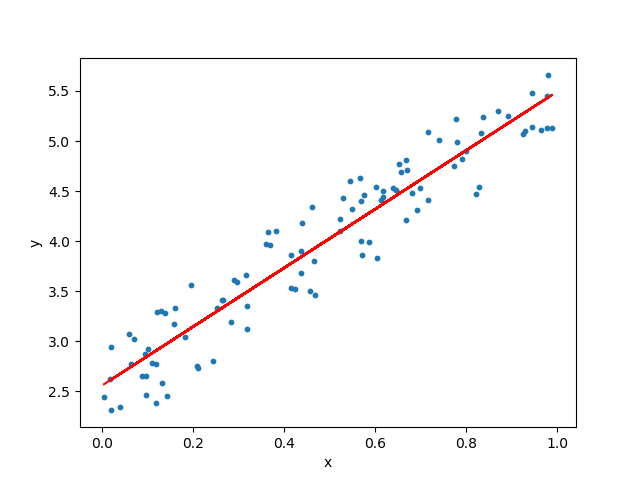

the best fitted line has least error value between estimated value and actual value
---------------------------------------
y axis shows  **DEPENDENT VARIABLE**
x axis shows **INDEPENDENT VARIABLE**



**linear regression and R-squared **

1. R-squared value is a statistical measures of how the close the data are the fitted regression line
2. it is also known as coefficient of determination or the coefficient of multiple detetrmination.

**CALCULATION OF R^2**
how to calculate of R-squared 

R^2 is nothing but it is = ε(Yp - y' )^2/ ε(y - y' )^2 

**Yp is predicted value
y' is mean value 
y is dependent value **
 
 
 **ARE LOW R -squared values always bad**
 > well in some field it is entirely expected as the R^2 value to be low for foe example any field that attempts to predict human behaviour(psychology) R^2(50% , R^2 is low  statistically significant predicators , then we can still draw a conclusion about how changes , in predicator values in the changes in response value.

**LETS LEARN CODE **




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**GRADIENT  DESCENT**(supervised learning)

1. THE MATH BEHIND gradient descent requires two concept of calculus 
> PARTIAL DERIVATIVES, CHAIN RULES




In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
print(boston.keys())

In [ ]:
boston.DESCR

1. **CRIM**: Per capita crime rate by town
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
3. **INDUS**: Proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**: Nitric oxide concentration (parts per 10 million)
6. **RM**: Average number of rooms per dwelling
7. **AGE**: Proportion of owner-occupied units built prior to 1940
8. **DIS**: Weighted distances to five Boston employment centers
9. **RAD**: Index of accessibility to radial highways
10. **TAX**: Full-value property tax rate per $10,000
11. **PTRATIO**: Pupil-teacher ratio by town
12. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
13. **LSTAT**: Percentage of lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
boston_ = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_.head()

In [ ]:
boston_['MEDV'] = boston.target

In [ ]:
boston_.head()

Let’s first plot the distribution of the target variable **MEDV**. We will use the distplot function from the seaborn library.




In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(boston_['MEDV'], bins=100)
plt.show()

We see that the values of MEDV are distributed normally with few **outliers** to know what are outliers click  [this](http://machinelearningmastery.com/how-to-identify-outliers-in-your-data/).

>we create a correlation matrix that measures the linear relationships between the variables. 
>The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
>We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [ ]:
correlation_matrix = boston_.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

**Observations**:
1. To fit a linear regression model, we select those features which have a high correlation with our target variable **MEDV**. By looking at the correlation matrix we can see that RM has a strong positive correlation with **MEDV** (0.7) where as **LSTAT** has a high negative correlation with MEDV(-0.74).

1. An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features **RAD**, **TAX** have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features **DIS** and **AGE** which have a correlation of -0.75.

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'RAD' , 'TAX']
target = boston_['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Observations**:
>The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

>The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

>The prices tend to increase  with an increase in radial highways (RAD)but it is good at median. Though it doesn’t look to be following exactly a linear line and having few outliers.

>The prices tend to increase with an increase in TAX . Though it doesn’t look to be following exactly a linear line and having few outliers at 700 


In [ ]:
X = pd.DataFrame(np.c_[boston_['LSTAT'], boston_['RM'] ,boston_['TAX'], boston_['RAD']], columns = ['LSTAT','RM', 'TAX', 'RAD'])
Y = boston_['MEDV']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

In [ ]:
y_pred = lin_model.predict(X_test)
y_pred.astype('float64')


In [ ]:
y_pred.reshape(102)

In [ ]:
Y_test[] 

FROM ABOVE RESULT OF Y-test and Y-pred WE CAN SAY THAT OUR MODEL IS PREDICTING GOOD
NOW WE CAN USE RMSE (The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.)
AND R2 ( R-squared is a statistical measure that’s used to assess the goodness of fit of our regression model ).



In [ ]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

**GIVE A SUPPORT BY UPVOTING THIS KERNEL IF YOU FIND IT USEFULL 
**

FORK AND USE GRADIENT DESCENT TO BOOST THE PERFORMANCE IF YOU WANT
